In [186]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [187]:
def load_data(f):
    s=sio.loadmat(f)
    X,Y=s['X'],s['y']
    g=np.random.randint(0,X.shape[0],100)
    v=X[g,:].reshape(100,20,20)
    k=0
    for i in range(0,10):
        k=v[i*10:((i+1)*10),:]
        if i==0:
            ll=k.reshape(200,20).T
        else:
            ll=np.vstack((ll,k.reshape(200,20).T))
    plt.imshow(ll)
    return X,Y.reshape(-1,1)

In [188]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))

In [189]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

In [190]:
def cost(theta,X,Y,lamda=0):
    m=Y.shape[0]
    return (-(1.0/m) * np.sum((Y*np.log(hyp(theta,X))) + ((1-Y)*np.log(1-hyp(theta,X))))) + ((lamda / (2.0*m))*np.sum(theta[1:]**2))

In [241]:
def grad(theta,X,Y,lamda=0):
    m=Y.shape[0]
    reg=np.vstack((np.zeros((1,theta.shape[1])),(lamda/m) * theta[1:]))
    return ((1.0/m)*np.dot(X.T,(hyp(theta,X)-Y))) + reg

In [243]:
def update(X,Y,theta,num_iter,alpha=0.01,lamda=0,debug=False,div=10):
    costhist=[]
    for i in range(num_iter):
        
        theta = theta - (alpha * grad(theta,X,Y,lamda))
        c=cost(theta,X,Y)
        costhist.append(c)
        if debug and i%div==0:
            print("Cost after " ,i," is ",c)
            
    return theta,costhist

In [253]:
def accuracy(X,Y,trained_theta):
    p=hyp(trained_theta,X)
    return 100*np.sum((np.argmax(p,axis=1)==np.argmax(Y,axis=1)))/Y.shape[0]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(5000, 401) (5000, 10)


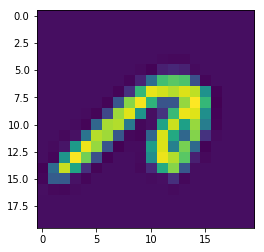

In [235]:
X,y=load_data('../machine-learning-ex3/ex3/ex3data1.mat')
X=np.hstack((np.ones((y.size,1)),X))
Y=np.zeros((y.size,10))
nos=(y%10)[:,0]
for i in range(0,y.size):
    Y[i,nos[i]]=1
idx=3343
plt.imshow(X[idx][1:].reshape(20,20))
print(Y[idx])
print(X.shape,Y.shape)

In [238]:
theta_t = np.array([-2, -1, 1, 2]).reshape(-1,1)
X_t = np.vstack((np.ones((1,5)),np.arange(1,16).reshape(3,5)/10)).T
y_t = np.array([1,0,1,0,1]).reshape(-1,1)
lambda_t = 3;
print('cost : ',cost(theta_t,X_t,y_t,lambda_t))
print('grad : ',grad(theta_t,X_t,y_t,lambda_t))

cost :  2.534819396109744
grad :  [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


Cost after  0  is  21.119392873493275
Cost after  100  is  0.7174590765135768
Cost after  200  is  0.6292480728668696
Cost after  300  is  0.5885421119940597
Cost after  400  is  0.5628398452864289
Cost after  500  is  0.5450904176739019
Cost after  600  is  0.532262921630002
Cost after  700  is  0.52182563826398
Cost after  800  is  0.5129739807176225
Cost after  900  is  0.5053034619387479
Cost after  1000  is  0.4985467947369129
Cost after  1100  is  0.49251813379773324
Cost after  1200  is  0.487083054712179
Cost after  1300  is  0.4821411831502237
Cost after  1400  is  0.4776155864128722
Cost after  1500  is  0.473445998636081
Cost after  1600  is  0.4695843283205323
Cost after  1700  is  0.46599158309815175
Cost after  1800  is  0.46263570728132286
Cost after  1900  is  0.4594900260098227
Cost after  2000  is  0.4565321033348992
Cost after  2100  is  0.45374288912581934
Cost after  2200  is  0.4511060713703706
Cost after  2300  is  0.4486075770345128
Cost after  2400  is  0.44623

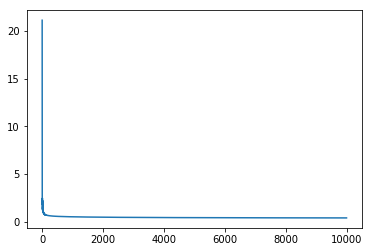

In [258]:
theta=np.zeros((X.shape[1],10))
trained_theta=theta
trained_theta,cost_hist=update(X,Y,trained_theta,10000,alpha=3,lamda=0.1,debug=True,div=100)
print(' Final Cost by gradeint descent : ',cost(trained_theta,X,Y),'Accuracy : ',accuracy(X,Y,trained_theta))
plt.plot(cost_hist)
plt.show()